In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets.california_housing import fetch_california_housing
housing = fetch_california_housing()
print(type(housing.data))
print(housing.DESCR)

<class 'numpy.ndarray'>
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for w

In [19]:
# get latitude and longtitude
print(housing.data[:,6:8])



[[   2.55555556   37.88       -122.23      ]
 [   2.10984183   37.86       -122.22      ]
 [   2.80225989   37.85       -122.24      ]
 ...
 [   2.3256351    39.43       -121.22      ]
 [   2.12320917   39.43       -121.32      ]
 [   2.61698113   39.37       -121.24      ]]


In [29]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO
dtr = DecisionTreeRegressor(max_depth=2)
dtr.fit(housing.data[:,[6,7]], housing.target)
#用于可视化显示
dot_data = StringIO()
export_graphviz(dtr,out_file=dot_data,feature_names=housing.feature_names[6:8])



import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.get_nodes()[7]
from IPython.display import Image
Image(graph[0].create_png())

TypeError: 'Dot' object is not subscriptable

In [5]:
# 用身高体重判定性别

# read the fitness excel form
import pandas as pd
fitnessData = pd.read_excel('C:/Users/guoxi/PycharmProjects/MachineLearning/datasets/fitness.xlsx')
fitnessData.head()

fitnessData[fitnessData['Gender']=='F'].head()

,MemberName,MemberMobilePhone,HomePhone,WorkPhone,Address,PostalCode,DOB,Gender,Height,Weight,MemberSince,FitnessPointsUpToNov18,FitnessPointsDec18
16,"Wu, Joanne",88364805,62991160,63101354.0,"314 Anchorvale Link, 06-16",540314,1969-03-05,F,167.0,92.0,2018-03-22,213,28.0
20,"Lin, Kimberly",91372928,66788104,NaN,"505 Hougang Ave 8, 13-03",530505,1974-11-20,F,163.0,91.0,2018-03-09,294,NaN
25,"Hsieh, Yi Ling",84762420,64509019,62509679.0,"747 Pasir Ris St 71, 12-02",510747,1973-09-03,F,164.0,87.0,2018-08-07,101,32.0
28,"Lee, Hui Yi",86756996,65549936,65740255.0,"267A Punggol Fld, 04-04",821267,1994-12-15,F,165.0,86.0,2018-09-02,120,44.0
33,"Lin, Lim",92306660,63186893,61603745.0,"659 Hougang Ave 8, 06-06",530659,1979-03-28,F,169.0,85.0,2018-09-09,93,NaN


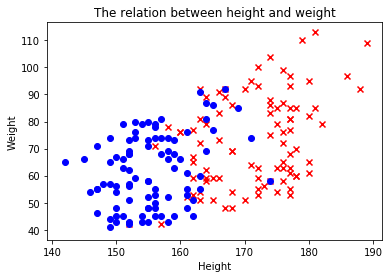

In [7]:
# 将男女的身高和体重与性别的关系展示出来，将体重或者身高为空的数据先清洗掉
import matplotlib.pyplot as plt
#fitnessData.iloc[:,8:9]
femaleData = fitnessData[(fitnessData['Gender']=='F') & (fitnessData['Height'].notnull())& (fitnessData['Weight'].notnull())]
maleData = fitnessData[(fitnessData['Gender']=='M') & (fitnessData['Height'].notnull())& (fitnessData['Weight'].notnull())]
plt.scatter(maleData.iloc[:,8:9],maleData.iloc[:,9:10],c='r',marker='x')
plt.scatter(femaleData.iloc[:,8:9],femaleData.iloc[:,9:10],c='b',marker='o')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('The relation between height and weight')
plt.show()

In [19]:
# 用graphviz构造决策树
from sklearn import tree
import numpy as np
humanbeings = fitnessData[fitnessData['Gender'].notnull() & fitnessData['Height'].notnull()& fitnessData['Weight'].notnull()]
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(humanbeings.iloc[:,8:10],humanbeings[['Gender']])
list(humanbeings[['Height','Weight']].columns)
print(np.unique(humanbeings[['Gender']].values))

['F' 'M']


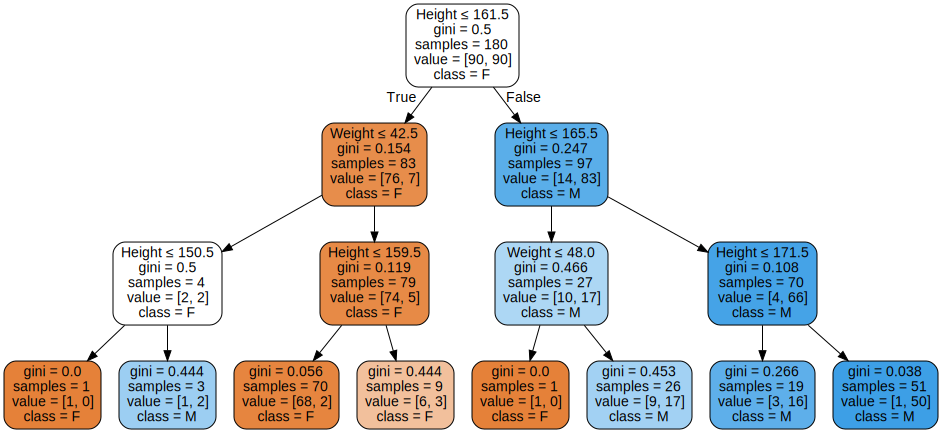

In [20]:
import graphviz
human_features = list(humanbeings[['Height','Weight']].columns)
human_targets = np.unique(humanbeings[['Gender']].values)
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=human_features,class_names=human_targets,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [16]:
predict_data = fitnessData[fitnessData['Gender'].isnull() & fitnessData['Height'].notnull()& fitnessData['Weight'].notnull()].iloc[:,8:10]
predict_data_null = fitnessData[fitnessData['Gender'].isnull()].iloc[:,8:10]
predict_data_null

,Height,Weight
61,177.0,75.0
117,157.0,60.0
124,158.0,59.0
126,153.0,59.0
160,156.0,52.0


In [21]:
clf.predict(predict_data)

array(['M', 'F', 'F', 'F', 'F'], dtype=object)

In [1]:
fitnessData.corr

NameError: name 'fitnessData' is not defined